In [1]:
# Loading Dependencies
from path import Path
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#load VADER
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Loading Data
data = Path('Resources/reddit.csv')
reddit_df = pd.read_csv(data)
reddit_df.head()

,title,score,subreddit,url,num_comments,body,date
0,UPVOTE so everyone sees we got SUPPORT,265029,wallstreetbets,https://i.redd.it/sgoqy8nyt2e61.png,11825,NaN,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,230844,wallstreetbets,https://i.redd.it/opzucppb15e61.png,23532,NaN,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,18318,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,185949,wallstreetbets,https://i.redd.it/a309gkm5yxd61.png,15495,NaN,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,184517,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,7105,NaN,2021-01-28 11:57:32


In [3]:
reddit_df.dtypes

title           object
score            int64
subreddit       object
url             object
num_comments     int64
body            object
date            object
dtype: object

In [4]:
# Look at subreddit value counts
subreddit = reddit_df.subreddit.value_counts()
subreddit

investing         987
stocks            985
wallstreetbets    953
Name: subreddit, dtype: int64

In [5]:
# Look at body value counts
body = reddit_df.body.value_counts()
body

Please use this thread to discuss your portfolio, learn of other stock tickers, and help out users by giving constructive criticism.\n\nWhy quarterly?  Public companies report earnings quarterly; many investors take this as an opportunity to rebalance their portfolios.  We highly recommend you do some reading:  A list of [relevant posts & book recommendations.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_posts_.26amp.3B_book_recommendations)\n\nYou can find stocks on your own by using a scanner like your broker's or [Finviz.](https://finviz.com/screener.ashx)  To help further, here's a list of [relevant websites.](https://www.reddit.com/r/stocks/wiki/index#wiki_relevant_websites.2Fapps)\n\nIf you don't have a broker yet, see our [list of brokers](https://www.reddit.com/r/stocks/wiki/index#wiki_brokers_for_investing) or search old posts.  If you haven't started investing or trading yet, then setup your [paper trading.](https://www.reddit.com/r/stocks/wiki/index#wiki_is_ther

In [6]:
# Create SQL engine

from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [7]:
# Read reddit_df dataframe to new SQL database. Currently set to replace on each run, until we can decide how 
# we want it to append with new CSV info in the future.

reddit_df.to_sql('reddit_raw_db', con=engine, if_exists='replace')
engine.execute("SELECT * FROM reddit_raw_db").fetchmany(size=20)


[(0, 'UPVOTE so everyone sees we got SUPPORT', 265029, 'wallstreetbets', 'https://i.redd.it/sgoqy8nyt2e61.png', 11825, None, '2021-01-29 00:40:34'),
 (1, 'GME YOLO update — Jan 28 2021', 230844, 'wallstreetbets', 'https://i.redd.it/opzucppb15e61.png', 23532, None, '2021-01-29 08:06:23'),
 (2, 'CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now', 204920, 'wallstreetbets', 'https://www.reddit.com/r/wallstreetbets/comments/l6x130/class_action_against_robinhood_allowing_people_to/', 18318, 'LEAVE ROBINHOOD. They dont deserve to make money off us after the millions they caused in losses. It might take a couple of days, but send Robinhood to the ground and GME to the moon.', '2021-01-29 00:49:11'),
 (3, 'GME YOLO update — Jan 27 2021 ---------------------

In [8]:
# Remove the 'body' column.
reddit_df.drop(['body'], axis=1, inplace=True)
reddit_df.head()

,title,score,subreddit,url,num_comments,date
0,UPVOTE so everyone sees we got SUPPORT,265029,wallstreetbets,https://i.redd.it/sgoqy8nyt2e61.png,11825,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,230844,wallstreetbets,https://i.redd.it/opzucppb15e61.png,23532,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,18318,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,185949,wallstreetbets,https://i.redd.it/a309gkm5yxd61.png,15495,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,184517,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,7105,2021-01-28 11:57:32


In [9]:
# Remove rows that have at least 1 null value.
reddit_df.dropna()

,title,score,subreddit,url,num_comments,date
0,UPVOTE so everyone sees we got SUPPORT,265029,wallstreetbets,https://i.redd.it/sgoqy8nyt2e61.png,11825,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,230844,wallstreetbets,https://i.redd.it/opzucppb15e61.png,23532,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,18318,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,185949,wallstreetbets,https://i.redd.it/a309gkm5yxd61.png,15495,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,184517,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,7105,2021-01-28 11:57:32
...,...,...,...,...,...,...
2920,DID WE MISS THE BOTTOM?! How are people this i...,348,stocks,https://www.reddit.com/r/stocks/comments/g1m6u...,283,2020-04-15 17:03:23
2921,Favorite Solar Stock(s)?,348,stocks,https://www.reddit.com/r/stocks/comments/jmct3...,176,2020-11-02 10:46:49
2922,"""NIO forms battery asset company""",352,stocks,https://www.reddit.com/r/stocks/comments/id8z3...,102,2020-08-20 23:02:48
2923,Amazon is building a $1.5 billion hub for its ...,349,stocks,https://www.reddit.com/r/stocks/comments/5rghg...,145,2017-02-02 03:35:04


In [10]:
# Checking Sentiment Scores
def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    
sentiment_analyzer_scores('UPVOTE so everyone sees we got SUPPORT')

UPVOTE so everyone sees we got SUPPORT-- {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.5319}


In [11]:
#Add VADER metrics to dataframe
reddit_df['compound'] = [analyzer.polarity_scores(v)['compound'] for v in reddit_df['title']]

reddit_df['neg'] = [analyzer.polarity_scores(v)['neg'] for v in reddit_df['title']]

reddit_df['neu'] = [analyzer.polarity_scores(v)['neu'] for v in reddit_df['title']]

reddit_df['pos'] = [analyzer.polarity_scores(v)['pos'] for v in reddit_df['title']]

reddit_df.head()

,title,score,subreddit,url,num_comments,date,compound,neg,neu,pos
0,UPVOTE so everyone sees we got SUPPORT,265029,wallstreetbets,https://i.redd.it/sgoqy8nyt2e61.png,11825,2021-01-29 00:40:34,0.5319,0.000,0.636,0.364
1,GME YOLO update — Jan 28 2021,230844,wallstreetbets,https://i.redd.it/opzucppb15e61.png,23532,2021-01-29 08:06:23,0.4278,0.000,0.679,0.321
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,18318,2021-01-29 00:49:11,-0.5994,0.107,0.893,0.000
3,GME YOLO update — Jan 27 2021 ----------------...,185949,wallstreetbets,https://i.redd.it/a309gkm5yxd61.png,15495,2021-01-28 08:15:35,0.4278,0.000,0.841,0.159
4,Can we all take a moment and appreciate the Mo...,184517,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,7105,2021-01-28 11:57:32,0.6369,0.000,0.794,0.206


In [12]:
reddit_df['subreddit'] = reddit_df['subreddit'].apply(lambda x:1 if x == "wallstreetbets" else 0)

In [13]:
reddit_df.head()

,title,score,subreddit,url,num_comments,date,compound,neg,neu,pos
0,UPVOTE so everyone sees we got SUPPORT,265029,1,https://i.redd.it/sgoqy8nyt2e61.png,11825,2021-01-29 00:40:34,0.5319,0.000,0.636,0.364
1,GME YOLO update — Jan 28 2021,230844,1,https://i.redd.it/opzucppb15e61.png,23532,2021-01-29 08:06:23,0.4278,0.000,0.679,0.321
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,1,https://www.reddit.com/r/wallstreetbets/commen...,18318,2021-01-29 00:49:11,-0.5994,0.107,0.893,0.000
3,GME YOLO update — Jan 27 2021 ----------------...,185949,1,https://i.redd.it/a309gkm5yxd61.png,15495,2021-01-28 08:15:35,0.4278,0.000,0.841,0.159
4,Can we all take a moment and appreciate the Mo...,184517,1,https://www.reddit.com/r/wallstreetbets/commen...,7105,2021-01-28 11:57:32,0.6369,0.000,0.794,0.206


In [14]:
# Read the cleaned and VADER modified reddit_df dataframe to new SQL database. Currently set to replace on each run, 
# until we can decide how we want it to append with new CSV info in the future.


reddit_df.to_sql('reddit_cleaned_with_VADER_db', con=engine, if_exists='replace')
engine.execute("SELECT * FROM reddit_cleaned_with_VADER_db").fetchmany(size=20)

[(0, 'UPVOTE so everyone sees we got SUPPORT', 265029, 1, 'https://i.redd.it/sgoqy8nyt2e61.png', 11825, '2021-01-29 00:40:34', 0.5319, 0.0, 0.636, 0.364),
 (1, 'GME YOLO update — Jan 28 2021', 230844, 1, 'https://i.redd.it/opzucppb15e61.png', 23532, '2021-01-29 08:06:23', 0.4278, 0.0, 0.679, 0.321),
 (2, 'CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now', 204920, 1, 'https://www.reddit.com/r/wallstreetbets/comments/l6x130/class_action_against_robinhood_allowing_people_to/', 18318, '2021-01-29 00:49:11', -0.5994, 0.107, 0.893, 0.0),
 (3, 'GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now', 185949, 1, 'https://i.redd.it/a309gkm5yxd61.png', 15495, '2021-01-28 08:15:35', 0.4278, 0.0, 0.841, 

In [15]:
# Read from DB into a dataframe for ML model

reddit_cleaned_with_VADER_df = pd.read_sql("reddit_cleaned_with_VADER_db", con=engine)

In [16]:
reddit_cleaned_with_VADER_df.head()

,index,title,score,subreddit,url,num_comments,date,compound,neg,neu,pos
0,0,UPVOTE so everyone sees we got SUPPORT,265029,1,https://i.redd.it/sgoqy8nyt2e61.png,11825,2021-01-29 00:40:34,0.5319,0.000,0.636,0.364
1,1,GME YOLO update — Jan 28 2021,230844,1,https://i.redd.it/opzucppb15e61.png,23532,2021-01-29 08:06:23,0.4278,0.000,0.679,0.321
2,2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,1,https://www.reddit.com/r/wallstreetbets/commen...,18318,2021-01-29 00:49:11,-0.5994,0.107,0.893,0.000
3,3,GME YOLO update — Jan 27 2021 ----------------...,185949,1,https://i.redd.it/a309gkm5yxd61.png,15495,2021-01-28 08:15:35,0.4278,0.000,0.841,0.159
4,4,Can we all take a moment and appreciate the Mo...,184517,1,https://www.reddit.com/r/wallstreetbets/commen...,7105,2021-01-28 11:57:32,0.6369,0.000,0.794,0.206


In [17]:
y = reddit_cleaned_with_VADER_df["subreddit"]
X = reddit_cleaned_with_VADER_df.drop(columns=["index","subreddit","title","url","date","num_comments","score"])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(2193, 4)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [21]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(200)

,Prediction,Actual
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
195,0,0
196,0,0
197,0,0
198,0,1


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6762295081967213


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.481


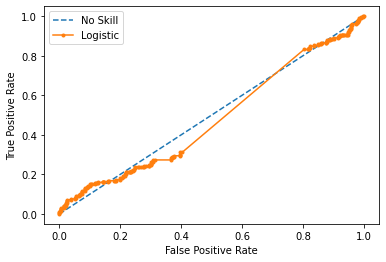

In [23]:
# ROC Curve

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Logistic: f1=0.008 auc=0.339


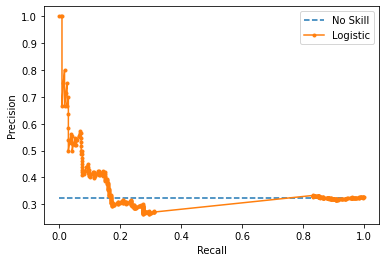

In [24]:
# Precision-Recall Curve

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifier.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()